## 训练一个分类


训练一个图形分类的步骤
+ 下载并标准化cifar10训练集和测试集 用torchvision
+ 定义一个CNN神经网络
+ 定义一个损失函数
+ 用训练集训练网络
+ 用测试集测试网络

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
#   torchvision数据集的输出是 PILImage 图形  of range[0,1] 
# 可以转换为标准tensor range[-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train = True,
                                       download = True,
                                       transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                         shuffle = True, num_workers = 2)
testset = torchvision.datasets.CIFAR10(root='./data', train = False,
                                      download = True,
                                      transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False,num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog','frog','horse','ship','truck')

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


100.0%

Files already downloaded and verified


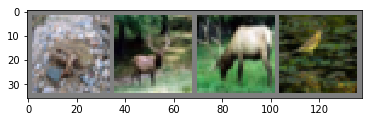

 frog  deer  deer  bird


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show();
    
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images 
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

定义一个cNN神经网络


In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()


定义一个损失函数和优化

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001, momentum = 0.9)

训练网络

In [9]:
for epoch in range(2):# loop over the dataset multiplt times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimizer
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')
    

[1,  2000] loss: 2.158
[1,  4000] loss: 1.830
[1,  6000] loss: 1.651
[1,  8000] loss: 1.566
[1, 10000] loss: 1.519
[1, 12000] loss: 1.480
[2,  2000] loss: 1.408
[2,  4000] loss: 1.402
[2,  6000] loss: 1.349
[2,  8000] loss: 1.343
[2, 10000] loss: 1.330
[2, 12000] loss: 1.303
Finished Training


测试神经网络

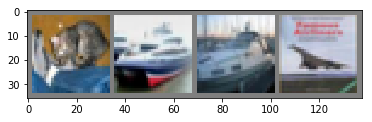

GroundTruth:   cat  ship  ship plane


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)
print('Predicted:',' '.join('%5s' % classes[predicted[j]] for j in range(4
                                                                        )))

Predicted:   cat   car   car plane


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accurary of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accurary of the network on the 10000 test images: 54 %


In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accurary of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accurary of plane : 64 %
Accurary of   car : 58 %
Accurary of  bird : 30 %
Accurary of   cat : 36 %
Accurary of  deer : 50 %
Accurary of   dog : 58 %
Accurary of  frog : 57 %
Accurary of horse : 61 %
Accurary of  ship : 64 %
Accurary of truck : 65 %
